In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from joblib import dump
import numpy as np

num_points = 100
X_1 = np.linspace(0,10,num_points)
y_1 = 2*X_1+2*np.random.normal(size=num_points)
data = {'X':X_1,'y':y_1}
data_1 = pd.DataFrame(data)
data_1.to_csv('./data1')

X_2 = np.linspace(0,10,num_points)
y_2 = 2*X_2+2*np.random.normal(size=num_points)
y_2[30:50] *= 3

data = {'X':X_2,'y':y_2}
data_2 = pd.DataFrame(data)
data_2.to_csv('./data2')

X_3 = np.linspace(0,10,num_points)
y_3 = 2*X_3+ np.random.normal(size=num_points)

data = {'X':X_3,'y':y_3}
data_3 = pd.DataFrame(data)
data_3.to_csv('./data3')

model = LinearRegression()
model.fit(data_1[['X']],data_1['y'])
y_pred = model.predict(data_1[['X']])
r2_score(data_1['y'],y_pred )
dump(model, 'model.joblib')

['model.joblib']

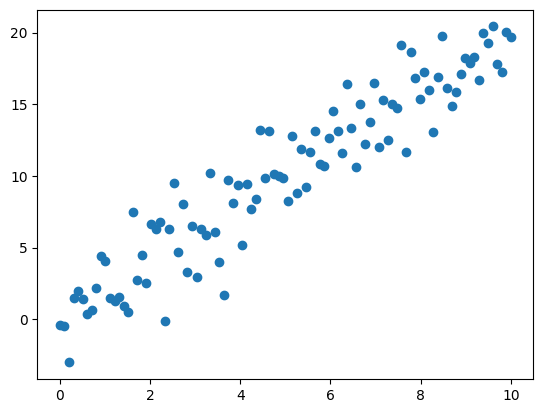

In [2]:
plt.scatter(X_1,y_1)


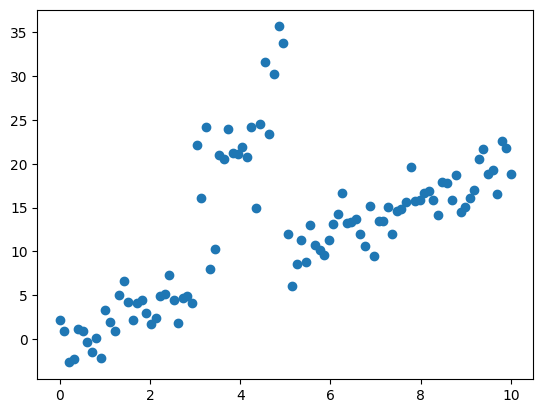

In [3]:
plt.scatter(X_2,y_2)

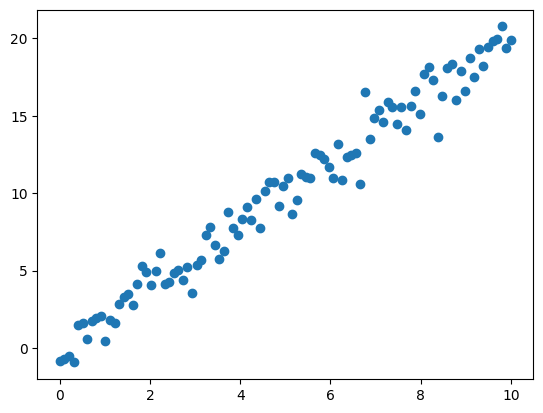

In [4]:

plt.scatter(X_3,y_3)

In [5]:
%%writefile test_linear_model.py
from joblib import load
import numpy as np
from sklearn.metrics import r2_score
import pytest
import pandas as pd
import pickle

@pytest.fixture(params = ['data1','data2','data3'])
def load_data(request):
  data = pd.read_csv(request.param)
  return data

def test_data1(load_data):
  lr = load('model.joblib')
  y_pred = lr.predict(load_data[['X']])
  r2 = r2_score(load_data['y'],y_pred)
  assert r2 >=0.5
  assert r2 <=1.0



Writing test_linear_model.py


In [6]:
! pytest test_linear_model.py -v

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 3 items                                                              

test_linear_model.py::test_data1[data1] PASSED                           [ 33%]
test_linear_model.py::test_data1[data2] FAILED                           [ 66%]
test_linear_model.py::test_data1[data3] PASSED                           [100%]

=================================== FAILURES ===================================
______________________________ test_data1[data2] _______________________________

load_data =     Unnamed: 0  ...          y
0            0  ...   2.150362
1            1  ...   0.914338
2            2  ...  -2.6...61
97          97  ...  22.609901
98          98  ...  21.747132
99          99  ...  18.855581

[100 rows x 3 columns]

    def test_data1(load_data):
     